<a href="https://colab.research.google.com/github/DoreenDoreen/Climate-Change-and-CO2-Levels-Prediction/blob/main/Climate_Change_and_CO2_Levels_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change and CO2 Levels Prediction - Time Series Project

The purpose of this project is to predict the future CO2 trend trajectory at Hawaii by using historical data (1974 - 2024).   

---



## Project Overview
#### 1. Data Upload
#### 2. Data Preprocessing
#### 3. Exploratory Data Analysis & Feature Engineering
#### 4. Model Forecasting & Evaluation

## The dataset used in this project was extracted from the NOAA website:

Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.


https://gml.noaa.gov/ccgg/trends/index.html

## Part 1: Data Upload

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Importing libraries
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Co2_df  = pd.read_csv('/content/drive/My Drive/GitHub Authentication Codes/co2_daily_data.csv', parse_dates=['date'], index_col='date')
Co2_df.head()

,co2
date,
1974-05-19,333.46
1974-05-20,333.64
1974-05-21,333.50
1974-05-22,333.21
1974-05-23,333.05


## Part 2: Data Preprocessing

In [ ]:
print('missing data: ', Co2_df.isnull().sum())

missing data:  co2    0
dtype: int64


In [ ]:
y = Co2_df['co2'].resample('MS').mean()  # the parameter of "MS" inside .resample() means "Month Start frequency"; .resample('MS') means "Group the data by each month, staring from the first day of each month"
                                              # .mean() means that "takes the average of each group (i.e., the average of all days within that month)"
y.head()

,co2
date,
1974-05-01,333.140909
1974-06-01,332.170400
1974-07-01,331.110000
1974-08-01,329.105769
1974-09-01,327.303182


In [ ]:
y.isnull().sum()  # checking missingness in the resampling dataset

np.int64(1)

## Part 3: Exploratory Data Analysis (EDA) & Feature Engineering

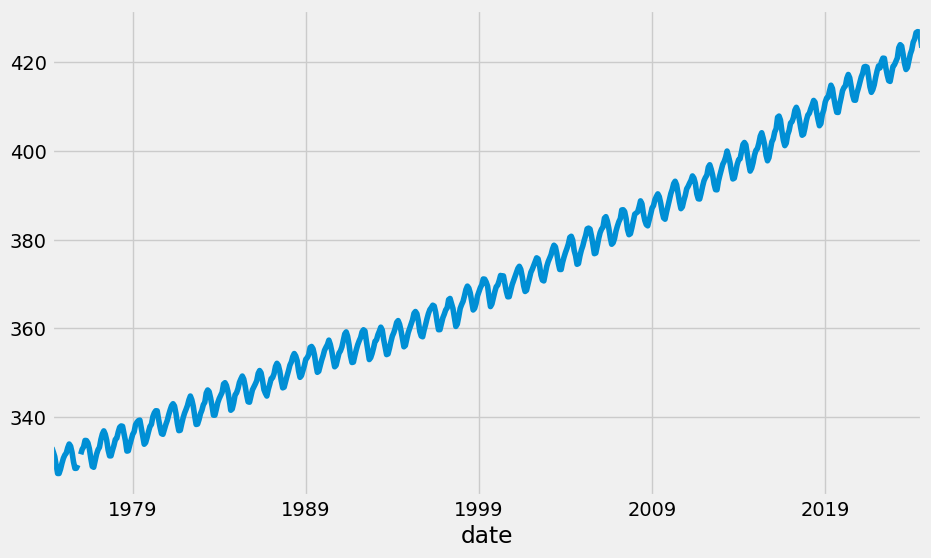

In [ ]:
y.plot(figsize=(10, 6))  # try to visualize new dataset and try to observe missing data
plt.show()

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y.describe()

,co2
count,603.000000
mean,371.533285
std,27.068044
min,327.300833
25%,348.653629
50%,368.364815
75%,393.269195
max,426.938065


In [ ]:
y.index

DatetimeIndex(['1974-05-01', '1974-06-01', '1974-07-01', '1974-08-01',
               '1974-09-01', '1974-10-01', '1974-11-01', '1974-12-01',
               '1975-01-01', '1975-02-01',
               ...
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', name='date', length=604, freq='MS')

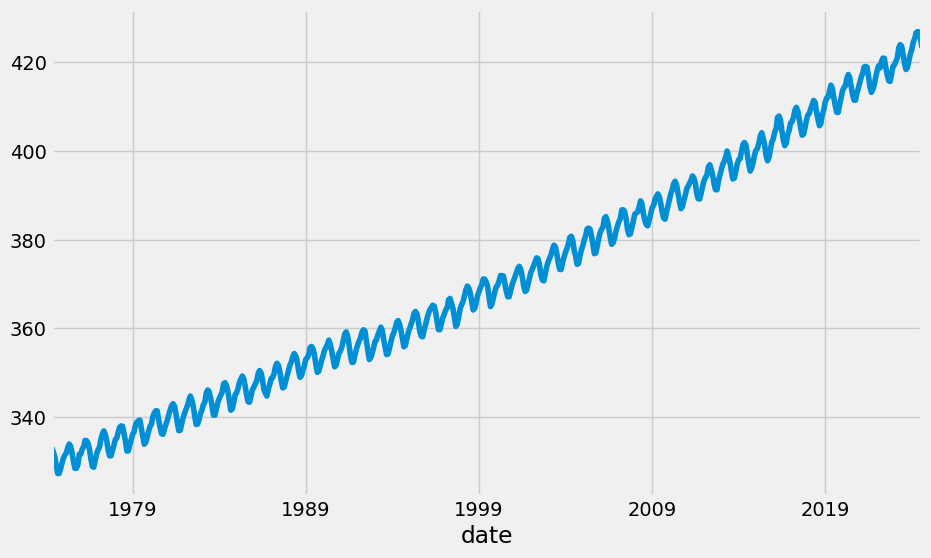

In [ ]:
y = y.fillna(y.bfill())

y.plot(figsize=(10, 6))
plt.show()

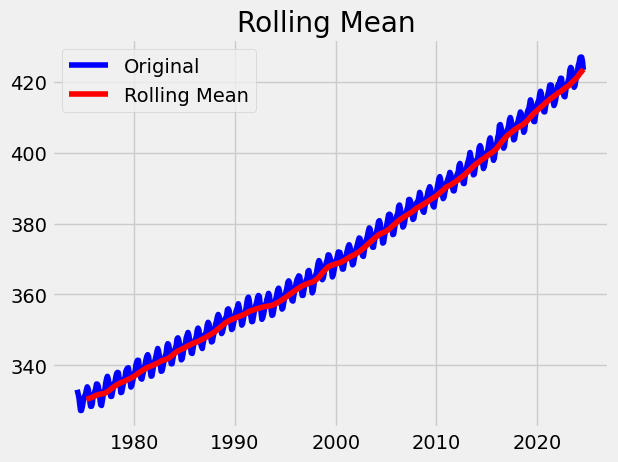

In [ ]:
rollingmean = y.rolling(window=12).mean()
rollingstd = y.rolling(window=12).std()
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rollingmean , color='red', label='Rolling Mean')
# std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.plot(figsize=(15, 10))
plt.legend(loc='best')
plt.title('Rolling Mean ')
plt.show(block=False)

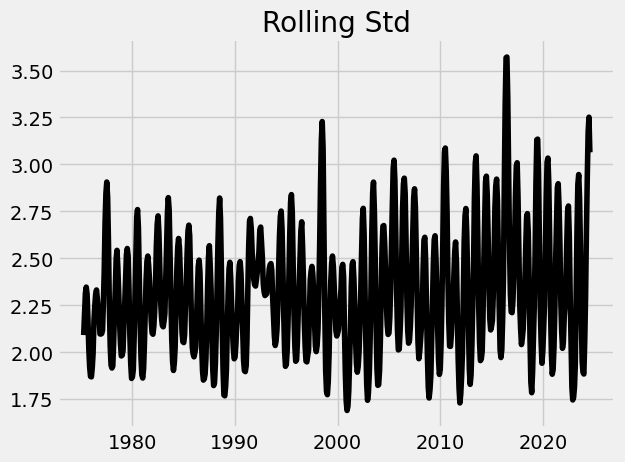

In [ ]:
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.title('Rolling Std')
plt.show(block=False)


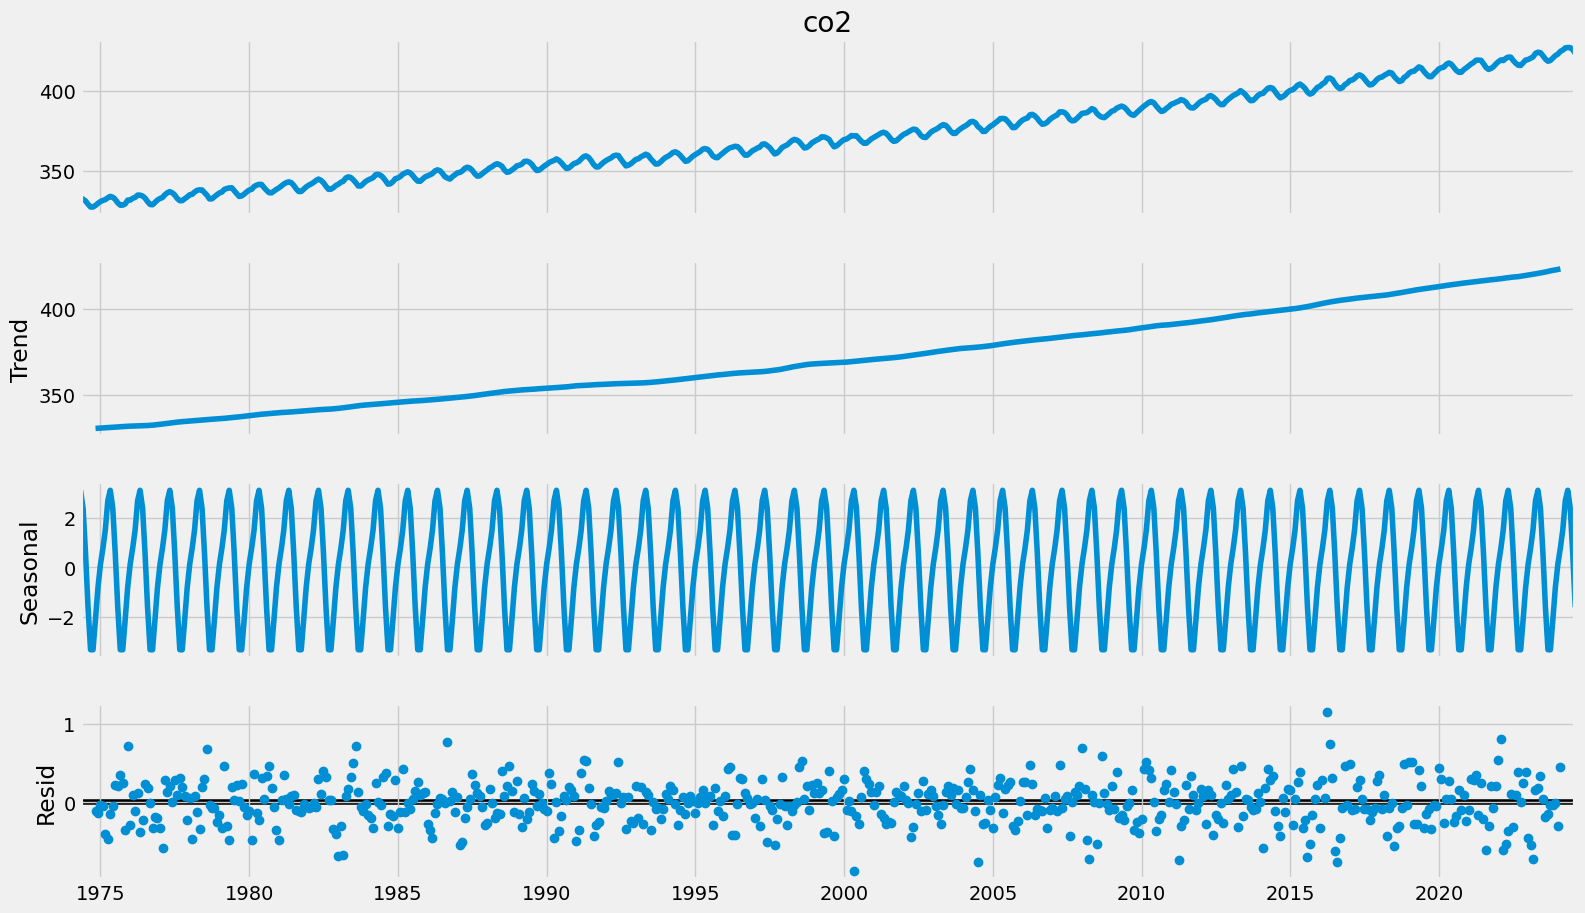

In [ ]:
deco = sm.tsa.seasonal_decompose(y, model='additive')   # import statsmodels.api as sm
fig = deco.plot()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
deco.resid.describe()

,resid
count,592.000000
mean,-0.003149
std,0.276304
min,-0.877700
25%,-0.165961
50%,-0.004346
75%,0.167561
max,1.158644


In [ ]:
deco.resid.isnull().sum()

np.int64(12)

In [ ]:
CO2Residual = deco.resid
CO2Residual = CO2Residual.fillna(CO2Residual.bfill())  # deal with missing residule via backword fill
CO2Residual = CO2Residual.fillna(CO2Residual.ffill())  # deal with missing residule via forword fill

In [ ]:
CO2Residual.describe()

,resid
count,604.000000
mean,0.000297
std,0.277537
min,-0.877700
25%,-0.161773
50%,-0.004346
75%,0.172763
max,1.158644


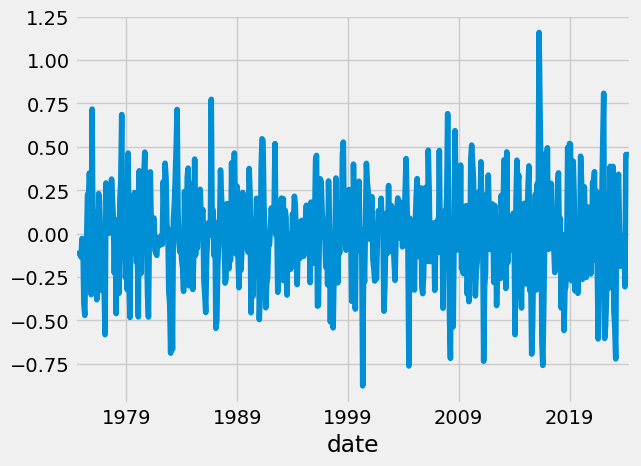

In [ ]:
fig = CO2Residual.plot()
plt.show()

### Check Stationary via ADF test

In [ ]:
ADFresult = adfuller(CO2Residual)

In [ ]:
print('ADF Statistic: %f' % ADFresult[0])
print('p-value: %f' % ADFresult[1])
print('Critical Values:')
for key, value in ADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.648489
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


In [ ]:
CO2trend = deco.trend
CO2trend = CO2trend.fillna(CO2trend.bfill())
CO2trend = CO2trend.fillna(CO2trend.ffill())
#CO2trend.isnull().sum()
CO2trend

,trend
date,
1974-05-01,330.471312
1974-06-01,330.471312
1974-07-01,330.471312
1974-08-01,330.471312
1974-09-01,330.471312
...,...
2024-04-01,423.325237
2024-05-01,423.325237
2024-06-01,423.325237


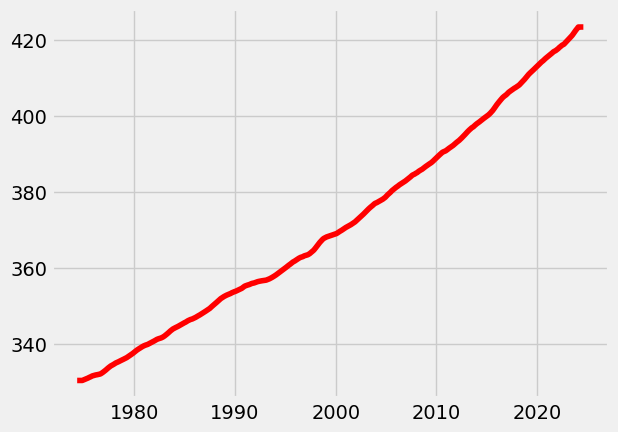

In [ ]:
mean = plt.plot(CO2trend , color='red', label='CO2trend')

In [ ]:
ADFresult_2 = adfuller(CO2trend)

In [ ]:
print('ADF Statistic: %f' % ADFresult_2[0])
print('p-value: %f' % ADFresult_2[1])
print('Critical Values:')
for key, value in ADFresult_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.555901
p-value: 1.000000
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


### Generate ACF and PACF plots

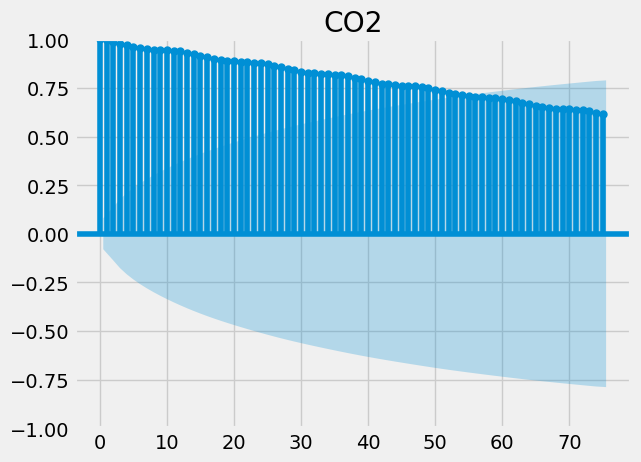

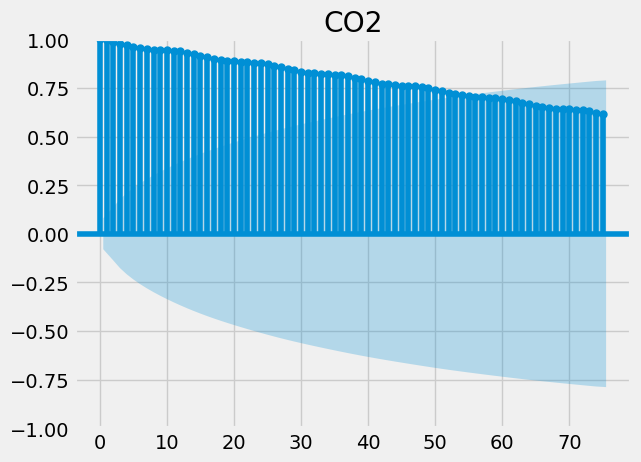

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(CO2Residual,title="CO2")
plot_acf(y,lags=75,title="CO2")

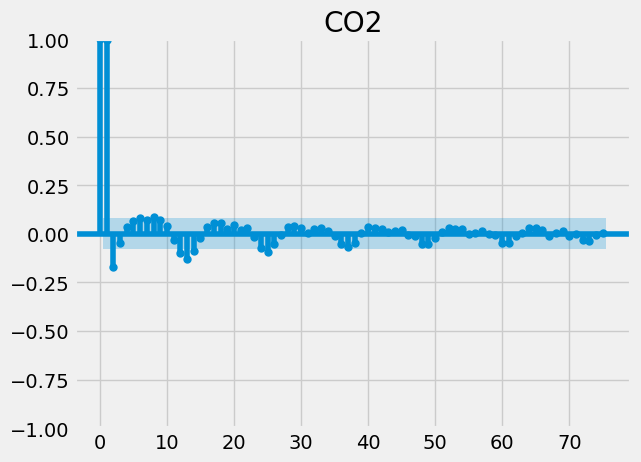

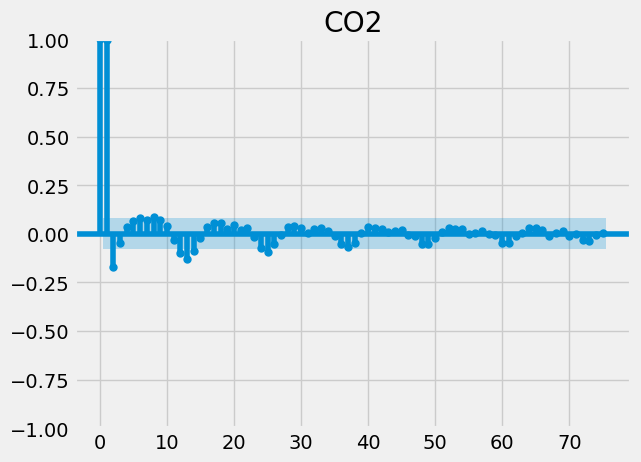

In [ ]:
#plot_pacf(CO2Residual,title="CO2")
plot_pacf(y,lags=75,title="CO2")

## Part 4: Model Forecasting and Evaluation

In [ ]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
				)  # fit data into ARIMA model do forecasting

TSresults = model.fit()

print(TSresults.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5679      0.047     11.970      0.000       0.475       0.661
ma.L1          0.3382      0.051      6.647      0.000       0.238       0.438
sigma2         0.7479      0.052     14.466      0.000       0.647       0.849


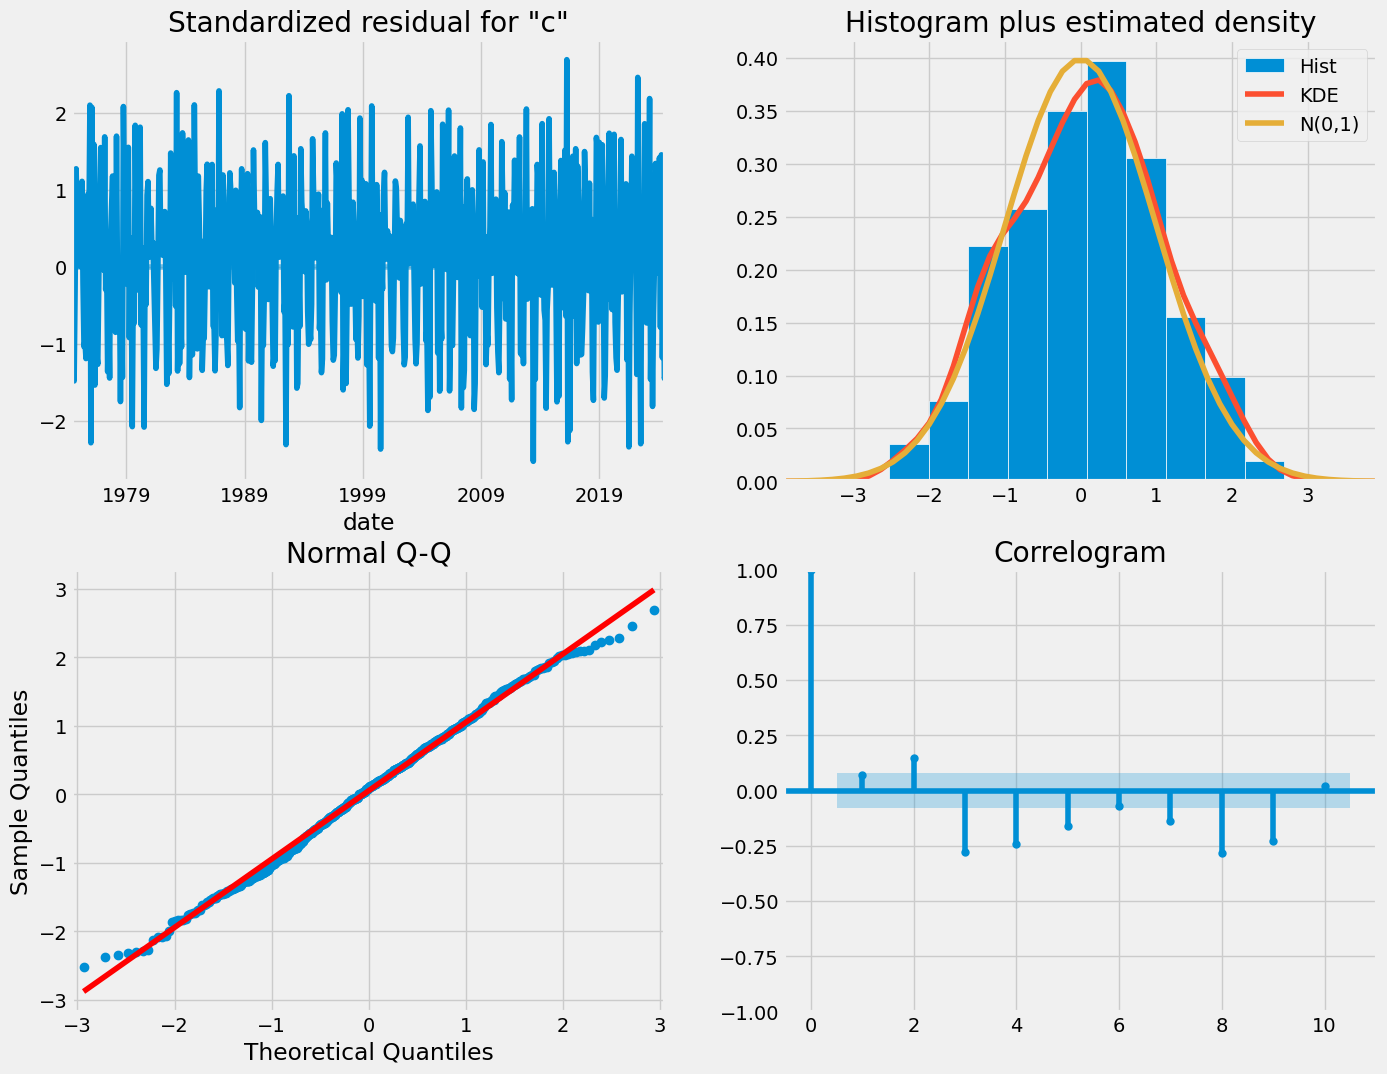

In [ ]:
TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

### Model Forecasting via Real Data

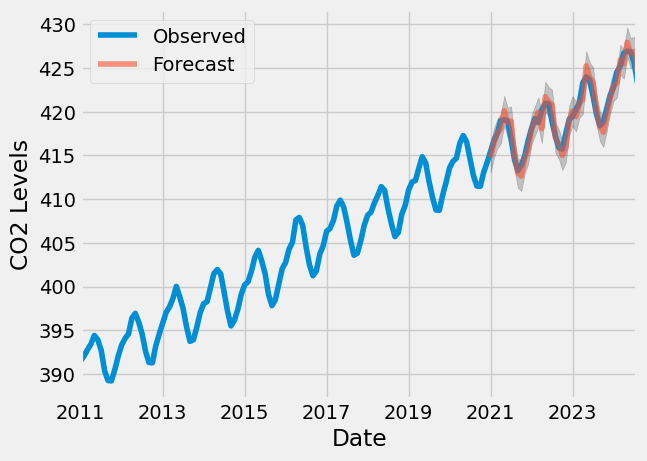

In [ ]:
pred = TSresults.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = y['2011':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
# pred_ci = pred.conf_int() => Returns the confidence interval of the fitted parameters.

pred_ci

,lower co2,upper co2
date,,
2021-01-01,413.062998,416.452938
2021-02-01,414.762107,418.152046
2021-03-01,415.812816,419.202756
2021-04-01,416.377664,419.767604
2021-05-01,418.437568,421.827507
2021-06-01,417.086921,420.476861
2021-07-01,417.225902,420.615841
2021-08-01,413.354756,416.744695
2021-09-01,411.297932,414.687872


In [ ]:
# Model Evaluation
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of model forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of model forecasts is 0.97


The smaller the MSE, the better the predictive accuracy.

### Model Forecasting via Predictive Data

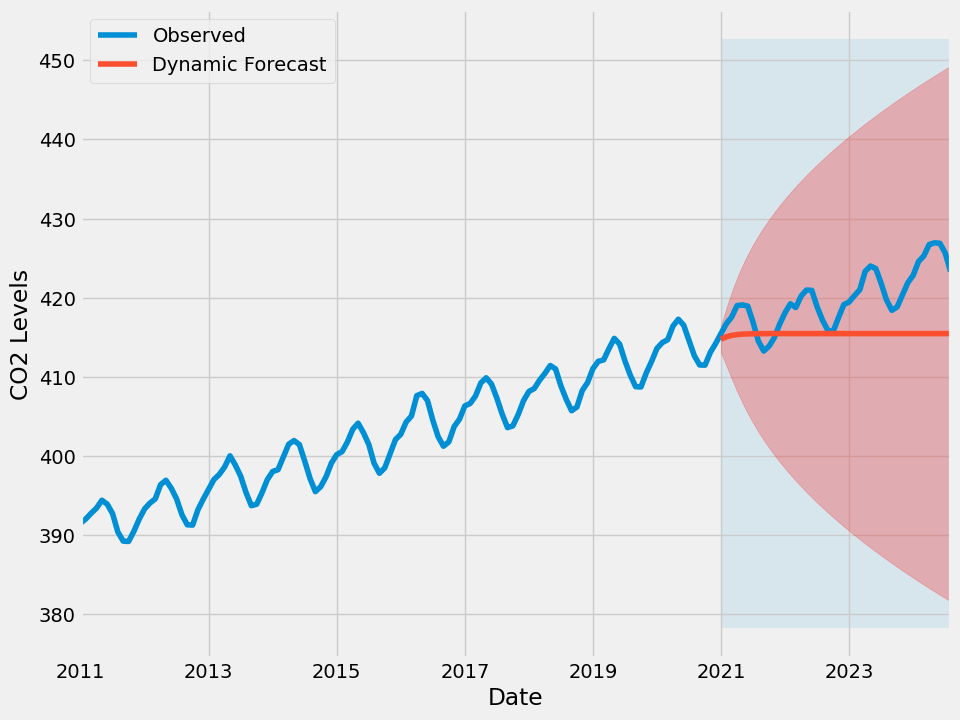

In [ ]:
#pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False, full_results=True)
pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


ax = y['2011':].plot(label='Observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='r', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()


In [ ]:
# Model Evaluation
y_forecasted_2 = pred_dynamic.predicted_mean
y_truth = y['2020-01-01':]

# Compute the mean square error
mse_dynamic = ((y_forecasted_2 - y_truth) ** 2).mean()
print('The Mean Squared Error of model forecasts is {}'.format(round(mse_dynamic, 2)))

The Mean Squared Error of model forecasts is 32.03
